In [6]:
import pymde

import numpy as np
import matplotlib.pyplot as plt
import torch

In [7]:
# load the cooccurrence matrix from compressed npz file
# cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix.npz')['arr_0']
# cooccurrence_matrix.shape

cooccurrence_matrix = np.load('../data/cooccurrence_matrix_wextra.npy')

In [8]:
cooccurrence_matrix[0]

array([0.00000000e+00, 4.71928176e+08, 5.73986723e+07, ...,
       3.31713000e+03, 8.64089000e+03, 2.05322000e+03])

In [10]:
import scipy.sparse as sp

# Build sparse matrix from the dense cooccurrence matrix, dropping the zero entries
cooccurrence_matrix_sparse = sp.csr_matrix(cooccurrence_matrix)
cooccurrence_graph = pymde.preprocess.Graph(cooccurrence_matrix_sparse)

In [11]:
dissimilarities = 1. / torch.log(cooccurrence_graph.weights + 1)

dissimilarity_graph = pymde.Graph.from_edges(cooccurrence_graph.edges, dissimilarities)
(dissimilarities.min(), dissimilarities.max())

(tensor(0.0474), tensor(4.4814))

In [12]:
shortest_path_graph = pymde.preprocess.graph.shortest_paths(dissimilarity_graph, verbose=True, n_workers=28)

Jan 19 04:40:06 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=None) ...
Jan 19 04:40:27 AM: Graph is weighted ... using slow path.
Jan 19 04:41:47 AM: processed node 1/11898
Jan 19 04:44:02 AM: processed node 1190/11898
Jan 19 04:46:17 AM: processed node 2379/11898
Jan 19 04:48:32 AM: processed node 3568/11898
Jan 19 04:50:51 AM: processed node 4757/11898
Jan 19 04:53:06 AM: processed node 5946/11898
Jan 19 04:55:20 AM: processed node 7135/11898
Jan 19 04:57:34 AM: processed node 8324/11898
Jan 19 04:59:48 AM: processed node 9513/11898
Jan 19 05:02:04 AM: processed node 10702/11898
Jan 19 05:04:20 AM: processed node 11891/11898


In [22]:
n_neighbors = 40
embedding_dim = 4

mde = pymde.preserve_neighbors(shortest_path_graph, embedding_dim=embedding_dim, verbose=True, max_distance=10000, n_neighbors=n_neighbors)

Jan 19 06:12:04 PM: Computing 40-nearest neighbors, with max_distance=10000
Jan 19 06:12:10 PM: Computing quadratic initialization.


In [23]:
X = mde.embed(verbose=True,)

Jan 19 06:12:15 PM: Fitting a centered embedding into R^4, for a graph with 11898 items and 921424 edges.
Jan 19 06:12:15 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Jan 19 06:12:15 PM: iteration 000 | distortion 0.526128 | residual norm 0.212996 | step length 0.692266 | percent change 0.0675892
Jan 19 06:12:16 PM: iteration 030 | distortion 0.434709 | residual norm 0.00163205 | step length 1 | percent change 0.868708
Jan 19 06:12:17 PM: iteration 060 | distortion 0.423474 | residual norm 0.000634778 | step length 1 | percent change 0.671593
Jan 19 06:12:18 PM: iteration 090 | distortion 0.419702 | residual norm 0.000778909 | step length 1 | percent change 0.446381
Jan 19 06:12:19 PM: iteration 120 | distortion 0.417019 | residual norm 0.00048126 | step length 1 | percent change 0.492419
Jan 19 06:12:20 PM: iteration 150 | distortion 0.415880 | residual norm 0.000283154 | step length 1 | percent change 0.332228
Jan 19 06:12:21 PM: iteration 180 | distortion

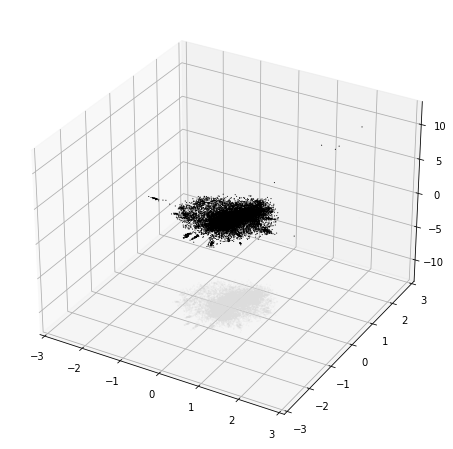

In [24]:
mde.plot(colors=['black'])
# plot from x=-3 to 3
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [25]:
# export in w2v format
fname = f'../data/pymde_{embedding_dim}d_{n_neighbors}n.w2v'
with open(fname, 'wt') as f:
    # write header
    f.write('{} {}\n'.format(len(X), mde.embedding_dim))
    for i in range(len(X)):
        row = X[i].tolist()
        f.write('{} {}\n'.format(i, ' '.join(map(str, row))))
fname

'../data/pymde_4d_40n.w2v'